<a href="https://colab.research.google.com/github/antonsysoev/comp_tech2025/blob/main/Lecture_8_nonlinear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

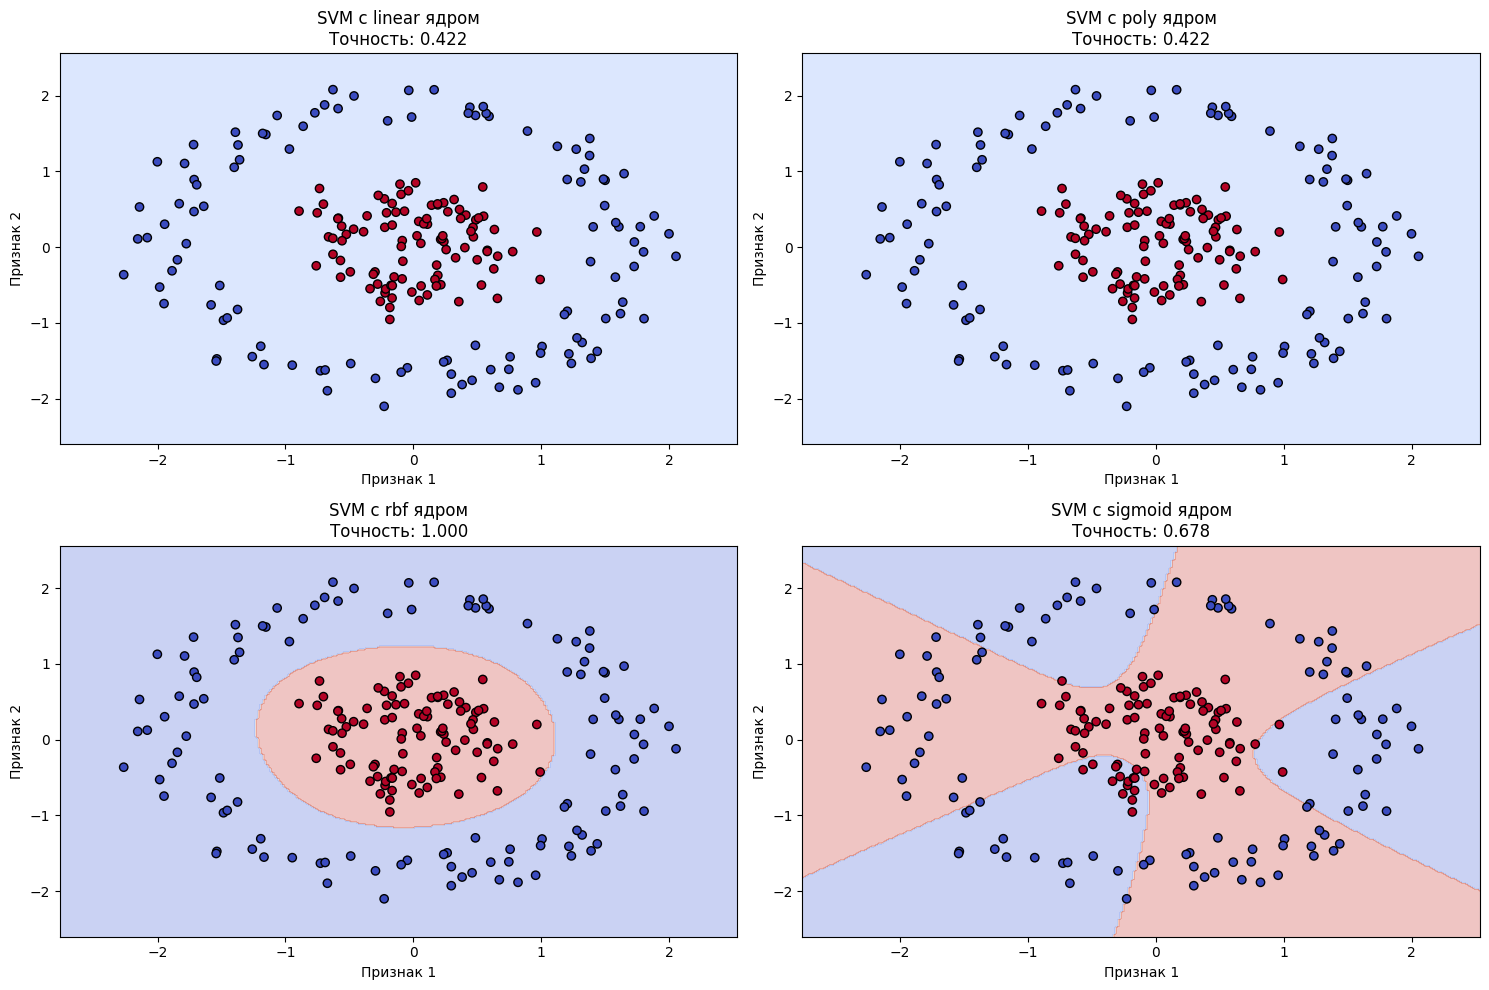

Лучшие параметры: {'C': 1, 'gamma': 'scale'}
Лучшая точность на кросс-валидации: 1.0
Количество опорных векторов: 25
Индексы опорных векторов: [  4  27  41  47  79 100 106 109 118 135]...


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_circles, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Создание нелинейно разделимых данных
X, y = make_circles(n_samples=300, noise=0.1, factor=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Сравнение различных ядер
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {}

plt.figure(figsize=(15, 10))

for i, kernel in enumerate(kernels):
    # Обучение SVM с разными ядрами
    if kernel == 'poly':
        svm = SVC(kernel=kernel, degree=3, gamma='scale', random_state=42)
    else:
        svm = SVC(kernel=kernel, gamma='scale', random_state=42)

    svm.fit(X_train_scaled, y_train)
    models[kernel] = svm

    # Визуализация
    plt.subplot(2, 2, i+1)

    # Создание mesh для отображения границы решения
    h = 0.02
    x_min, x_max = X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5
    y_min, y_max = X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f'SVM с {kernel} ядром\nТочность: {accuracy_score(y_test, svm.predict(X_test_scaled)):.3f}')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')

plt.tight_layout()
plt.show()

# Подбор гиперпараметров для RBF ядра
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42),
                          param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность на кросс-валидации:", grid_search.best_score_)

# Анализ опорных векторов
best_svm = grid_search.best_estimator_
print(f"Количество опорных векторов: {len(best_svm.support_vectors_)}")
print(f"Индексы опорных векторов: {best_svm.support_[:10]}...")  # первые 10

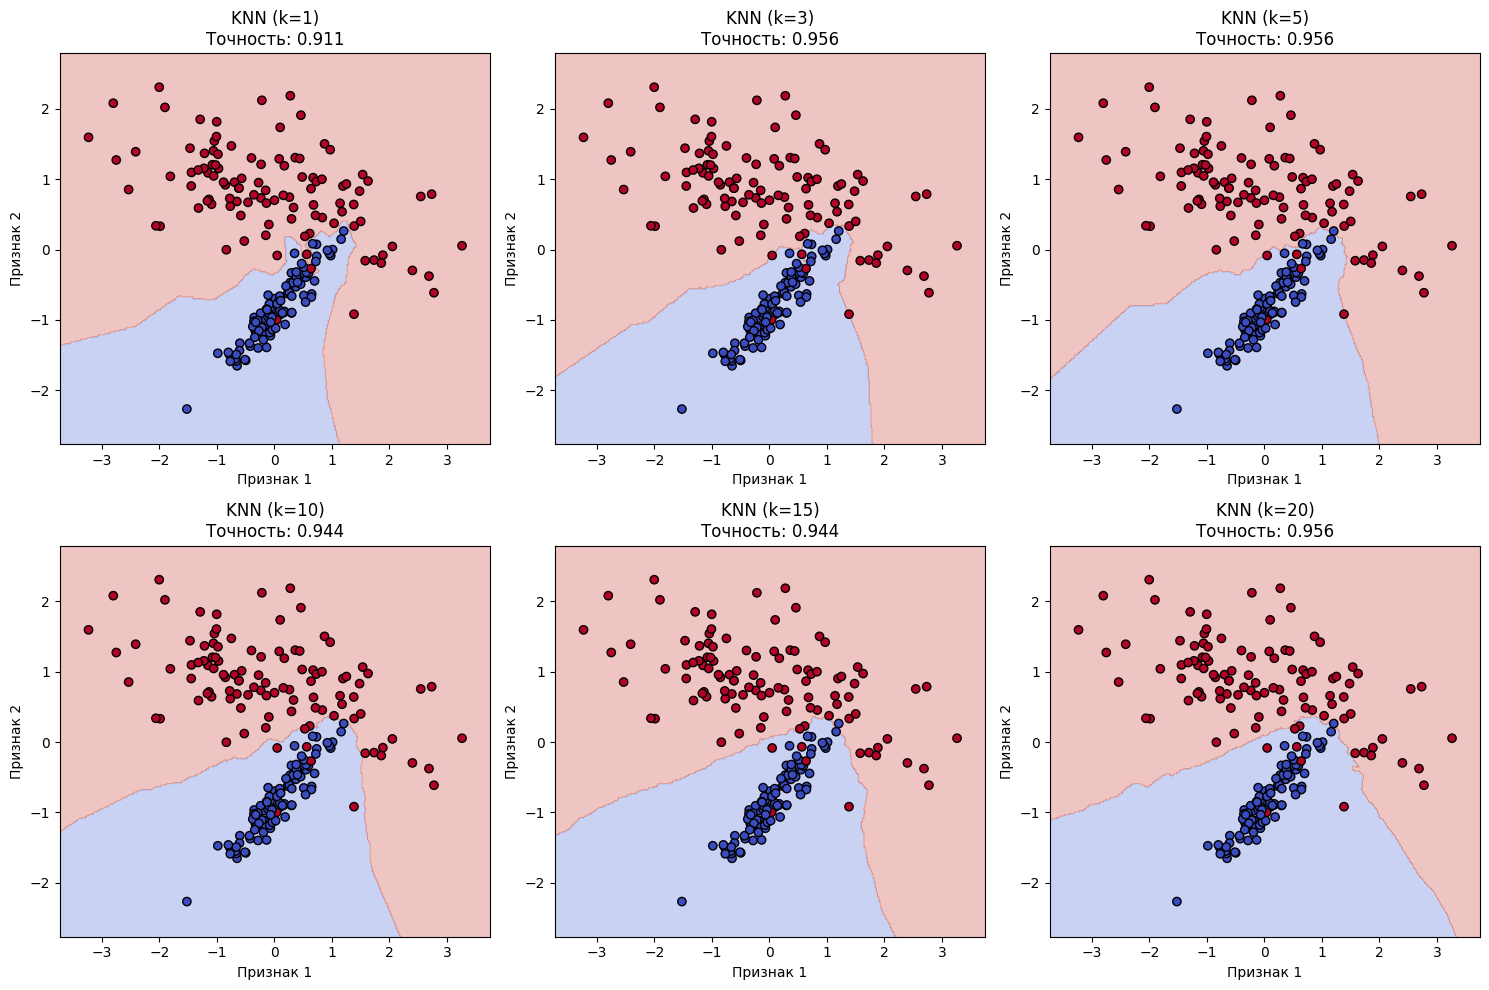

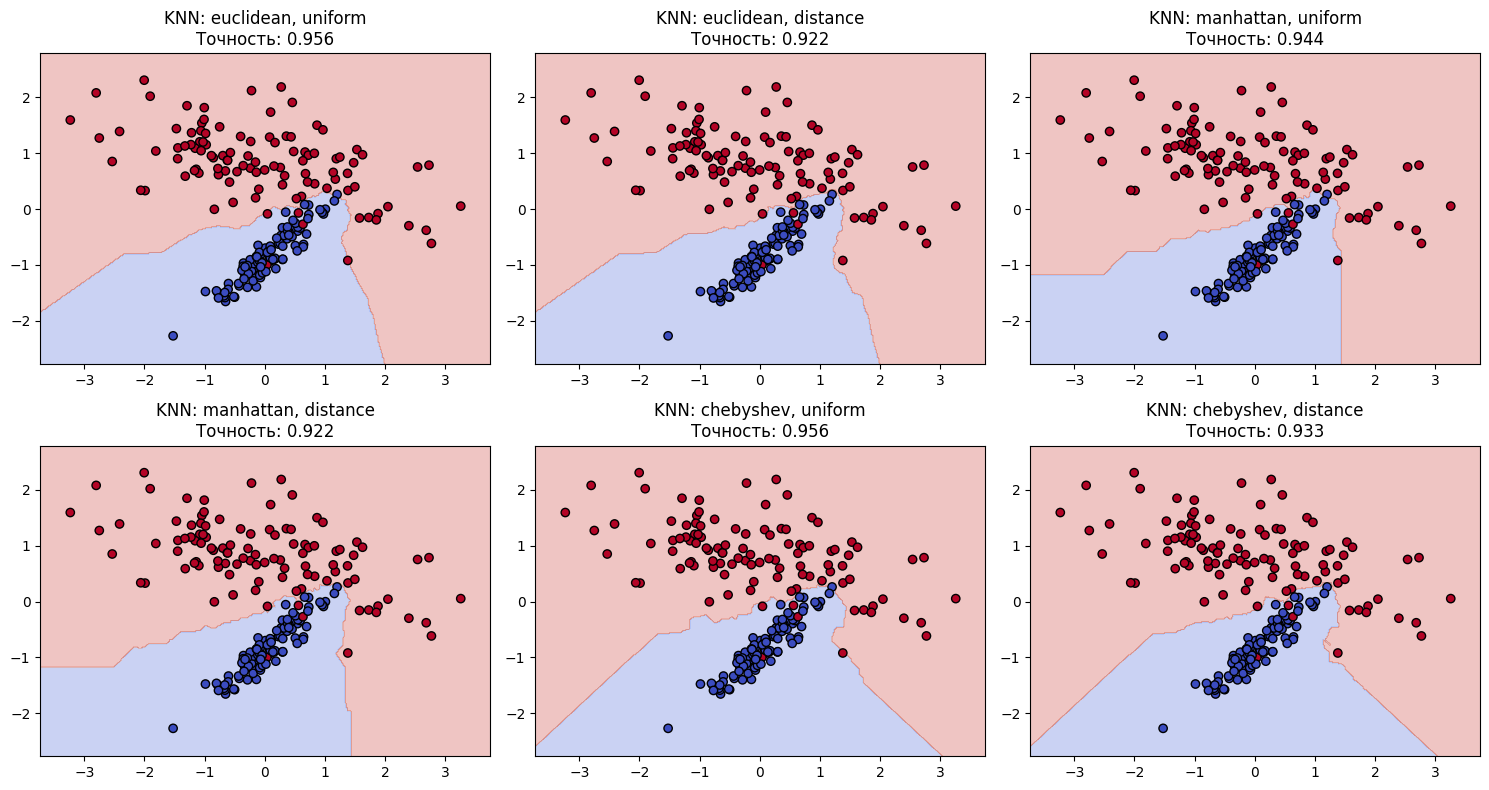

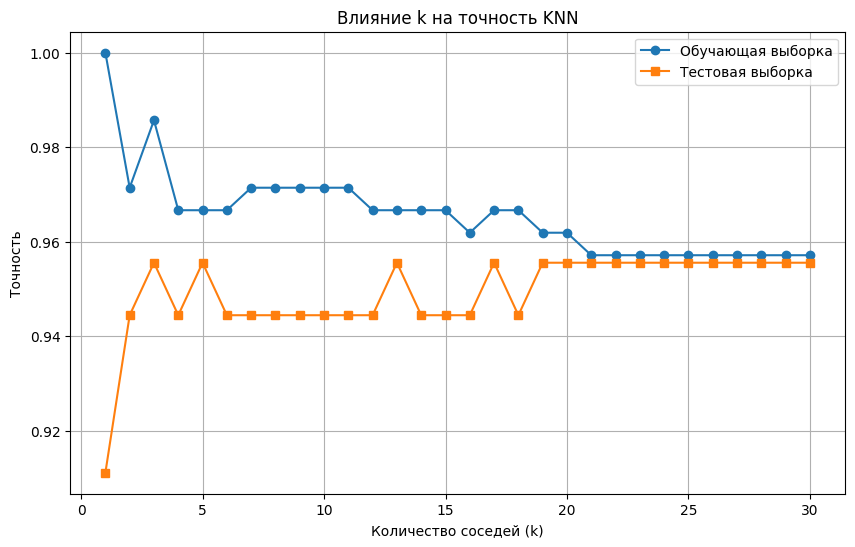

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Создание данных для KNN
X_knn, y_knn = make_classification(n_samples=300, n_features=2, n_redundant=0,
                                  n_informative=2, n_clusters_per_class=1,
                                  random_state=42)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn, y_knn, test_size=0.3, random_state=42)

# Масштабирование
scaler_knn = StandardScaler()
X_train_knn_scaled = scaler_knn.fit_transform(X_train_knn)
X_test_knn_scaled = scaler_knn.transform(X_test_knn)

# Сравнение различных значений k
k_values = [1, 3, 5, 10, 15, 20]
knn_models = {}

plt.figure(figsize=(15, 10))

for i, k in enumerate(k_values):
    # Обучение KNN
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn.fit(X_train_knn_scaled, y_train_knn)
    knn_models[k] = knn

    # Визуализация
    plt.subplot(2, 3, i+1)

    # Создание mesh для отображения границы решения
    h = 0.02
    x_min, x_max = X_train_knn_scaled[:, 0].min() - 0.5, X_train_knn_scaled[:, 0].max() + 0.5
    y_min, y_max = X_train_knn_scaled[:, 1].min() - 0.5, X_train_knn_scaled[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_train_knn_scaled[:, 0], X_train_knn_scaled[:, 1],
                c=y_train_knn, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f'KNN (k={k})\nТочность: {accuracy_score(y_test_knn, knn.predict(X_test_knn_scaled)):.3f}')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')

plt.tight_layout()
plt.show()

# Сравнение различных метрик расстояния
metrics = ['euclidean', 'manhattan', 'chebyshev']
weights_types = ['uniform', 'distance']

plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics):
    for j, weights in enumerate(weights_types):
        knn = KNeighborsClassifier(n_neighbors=5, metric=metric, weights=weights)
        knn.fit(X_train_knn_scaled, y_train_knn)

        plt.subplot(2, 3, i*2 + j + 1)

        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        plt.scatter(X_train_knn_scaled[:, 0], X_train_knn_scaled[:, 1],
                    c=y_train_knn, cmap=plt.cm.coolwarm, edgecolors='k')
        plt.title(f'KNN: {metric}, {weights}\nТочность: {accuracy_score(y_test_knn, knn.predict(X_test_knn_scaled)):.3f}')

plt.tight_layout()
plt.show()

# Анализ влияния k на точность
train_scores = []
test_scores = []
k_range = range(1, 31)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn_scaled, y_train_knn)
    train_scores.append(accuracy_score(y_train_knn, knn.predict(X_train_knn_scaled)))
    test_scores.append(accuracy_score(y_test_knn, knn.predict(X_test_knn_scaled)))

plt.figure(figsize=(10, 6))
plt.plot(k_range, train_scores, label='Обучающая выборка', marker='o')
plt.plot(k_range, test_scores, label='Тестовая выборка', marker='s')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность')
plt.title('Влияние k на точность KNN')
plt.legend()
plt.grid(True)
plt.show()

Сравнение SVM и KNN на различных задачах:
Круги:
  SVM точность: 1.000
  KNN точность: 1.000
  Разность: 0.000

Линейно разделимые:
  SVM точность: 0.956
  KNN точность: 0.956
  Разность: 0.000

Кластеры:
  SVM точность: 1.000
  KNN точность: 1.000
  Разность: 0.000


Демонстрация проклятия размерности:


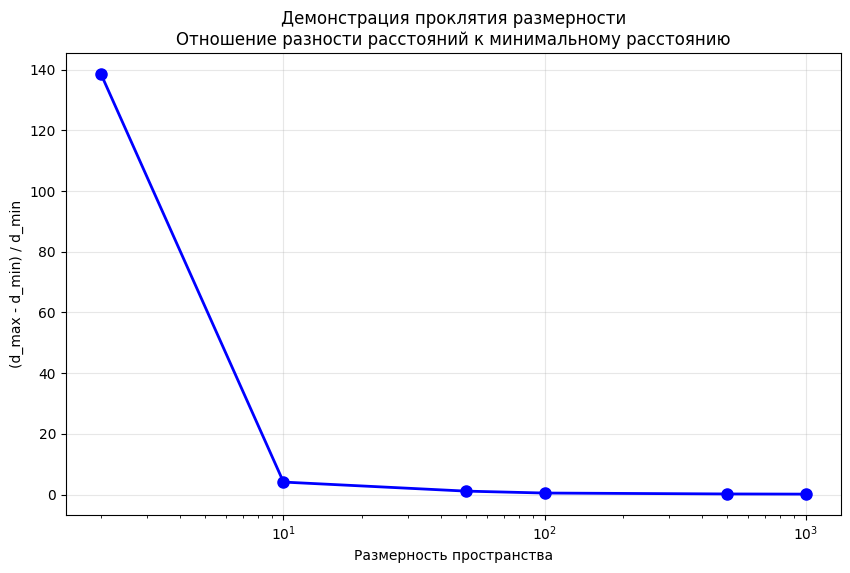

Размерность 2: отношение = 138.5313
Размерность 10: отношение = 4.1216
Размерность 50: отношение = 1.1375
Размерность 100: отношение = 0.5036
Размерность 500: отношение = 0.2032
Размерность 1000: отношение = 0.1467


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# Сравнение SVM и KNN на различных задачах
def compare_methods(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Масштабирование
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # SVM с RBF ядром
    svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
    svm.fit(X_train_scaled, y_train)
    svm_score = accuracy_score(y_test, svm.predict(X_test_scaled))

    # KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)
    knn_score = accuracy_score(y_test, knn.predict(X_test_scaled))

    print(f"{dataset_name}:")
    print(f"  SVM точность: {svm_score:.3f}")
    print(f"  KNN точность: {knn_score:.3f}")
    print(f"  Разность: {abs(svm_score - knn_score):.3f}")
    print()

# Тестирование на разных наборах данных
print("Сравнение SVM и KNN на различных задачах:")
print("="*50)

# 1. Круги (нелинейно разделимые)
X1, y1 = make_circles(n_samples=300, noise=0.1, factor=0.3, random_state=42)
compare_methods(X1, y1, "Круги")

# 2. Классификация (линейно разделимые)
X2, y2 = make_classification(n_samples=300, n_features=2, n_redundant=0,
                            n_informative=2, random_state=42)
compare_methods(X2, y2, "Линейно разделимые")

# 3. Случайные кластеры
X3, y3 = make_blobs(n_samples=300, centers=3, random_state=42)
compare_methods(X3, y3, "Кластеры")

# Демонстрация проклятия размерности
def curse_of_dimensionality_demo():
    np.random.seed(42)
    dimensions = [2, 10, 50, 100, 500, 1000]
    ratios = []

    for d in dimensions:
        # Генерация случайных точек в d-мерном пространстве
        points = np.random.randn(1000, d)

        # Вычисление отношений расстояний
        center = np.zeros(d)
        distances = np.linalg.norm(points - center, axis=1)

        d_min = np.min(distances)
        d_max = np.max(distances)
        ratio = (d_max - d_min) / d_min if d_min > 0 else 0
        ratios.append(ratio)

    plt.figure(figsize=(10, 6))
    plt.plot(dimensions, ratios, 'bo-', linewidth=2, markersize=8)
    plt.xscale('log')
    plt.xlabel('Размерность пространства')
    plt.ylabel('(d_max - d_min) / d_min')
    plt.title('Демонстрация проклятия размерности\nОтношение разности расстояний к минимальному расстоянию')
    plt.grid(True, alpha=0.3)
    plt.show()

    return dimensions, ratios

print("\nДемонстрация проклятия размерности:")
dims, ratios = curse_of_dimensionality_demo()
for d, r in zip(dims, ratios):
    print(f"Размерность {d}: отношение = {r:.4f}")